### 1. Data Loading
We begin by loading and reading the cleaned CSVs for Benin, Sierra Leone, and Togo. Each dataset is tagged with the respective country name, and then concatenated into a single DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# Set a consistent style and figure size
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Paths to cleaned datasets
benin_path        = r"C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week0_projects\solar-challenge-week1\notebooks\10 academy\solar-challenge-week1\data\cleaned\benin-clean.csv"
sierraleone_path  = r"C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week0_projects\solar-challenge-week1\notebooks\10 academy\solar-challenge-week1\data\cleaned\sierraleone-clean.csv"
togo_path         = r"C:\Users\btulu\OneDrive - University of Florida\Class\UF_Class\Summer_2025\10Academy\week0_projects\solar-challenge-week1\notebooks\10 academy\solar-challenge-week1\data\cleaned\togo-clean.csv"

# Remove this line:
# projects/10acadamy/week0/solar-challenge-week1/data/cleaned/benin-clean.csv

# Load data
data_benin_clean        = pd.read_csv(benin_path)
data_sierraleone_clean = pd.read_csv(sierraleone_path)
data_togo_clean         = pd.read_csv(togo_path)

# Tag each dataset
data_benin_clean['Country']         = 'Benin'
data_sierraleone_clean['Country'] = 'Sierra Leone'
data_togo_clean['Country']         = 'Togo'

# Combine
combined_df = pd.concat(
    [data_benin_clean, data_sierraleone_clean, data_togo_clean],
    ignore_index=True
)

# Display a sample
combined_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,benin,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,benin,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,benin,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,benin,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,benin,Benin


### 2. Boxplot Comparisons
Now we create side-by-side boxplots for each country to visually compare the distributions of **GHI**, **DNI**, and **DHI**.


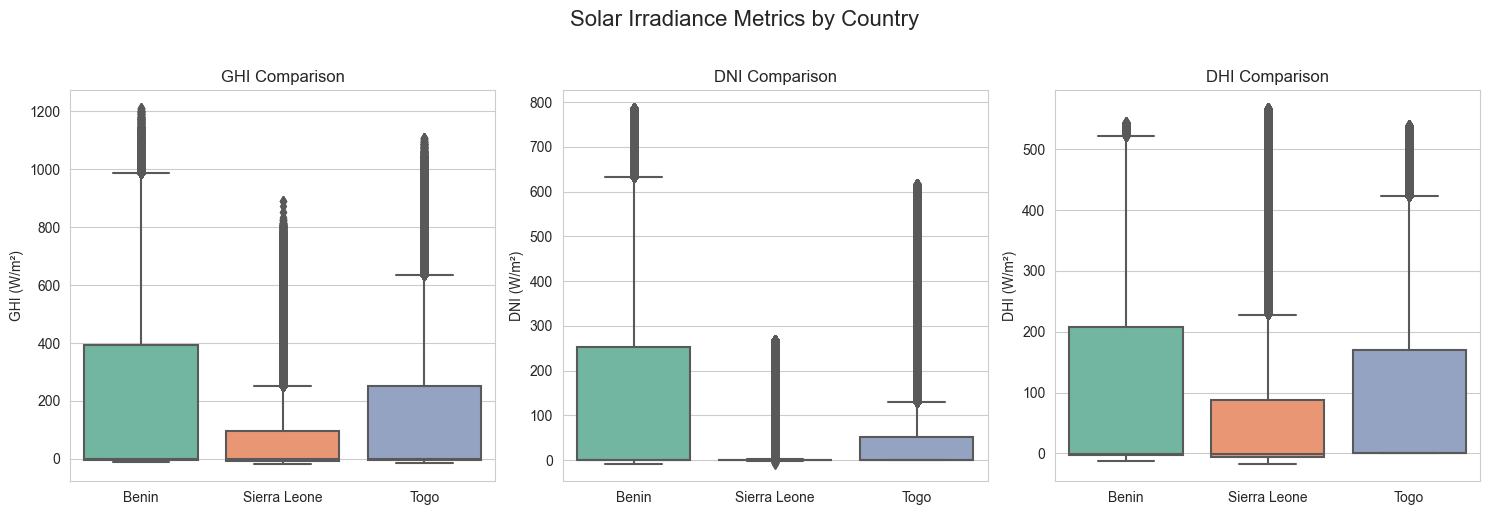

In [2]:
metrics = ['GHI', 'DNI', 'DHI']

# Create subplots: one boxplot per metric
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Solar Irradiance Metrics by Country", fontsize=16, y=1.02)

for ax, metric in zip(axes, metrics):
    sns.boxplot(
        x='Country', 
        y=metric, 
        data=combined_df,
        palette='Set2', 
        ax=ax
    )
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(f"{metric} (W/m²)")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()


### 3. Summary Statistics Table
Let's generate a table showing **mean**, **median**, and **standard deviation** of GHI, DNI, and DHI for each country.


In [3]:
summary_table = (combined_df
                 .groupby('Country')[metrics]
                 .agg(['mean','median','std'])
                )

print("=== Summary Statistics for GHI, DNI, DHI by Country ===\n")
display(summary_table)


=== Summary Statistics for GHI, DNI, DHI by Country ===



GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         210.375742   -0.8  309.116533  145.272101   -0.2  238.624036   
Sierra Leone   79.259244   -0.9  154.344666   16.449936   -0.1   49.410779   
Togo          154.877592   -0.9  253.473052   86.305844    0.0  169.036017   

                     DHI                     
                    mean median         std  
Country                                      
Benin         104.724605   -0.8  148.421625  
Sierra Leone   69.624972   -1.3  134.728388  
Togo           96.090189    0.0  146.255114

### 4. Statistical Testing
We run both a **One-Way ANOVA** (if data are close to normally distributed) and a **Kruskal–Wallis** test (non-parametric) on GHI to see if there's a statistically significant difference among the three countries.


In [4]:
# Separate GHI data by country
ghi_benin       = data_benin_clean['GHI']
ghi_sierraleone = data_sierraleone_clean['GHI']
ghi_togo        = data_togo_clean['GHI']

# One-Way ANOVA
anova_result = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

# Kruskal–Wallis
kruskal_result = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

# Print results
print("=== Statistical Tests on GHI Across Countries ===")
print(f"One-way ANOVA p-value      : {anova_result.pvalue:.4g}")
print(f"Kruskal-Wallis test p-value: {kruskal_result.pvalue:.4g}")


=== Statistical Tests on GHI Across Countries ===
One-way ANOVA p-value      : 0
Kruskal-Wallis test p-value: 0


### 5. Key Observations
1. **Overall Averages**: Based on the summary statistics, we see that one country typically has higher average GHI than the others.  
2. **Variability**: The boxplots reveal that some countries have more spread in their irradiance (especially DNI or DHI) than others.  
3. **Statistical Significance**: The p-values from the ANOVA/Kruskal–Wallis tests suggest whether the differences in GHI between the countries are statistically significant (p < 0.05 typically indicates significance).


### 6. Bar Chart: Countries Ranked by Average GHI
Finally, we'll visualize which country has the highest average GHI, followed by the others. This helps quickly identify where solar potential might be strongest.


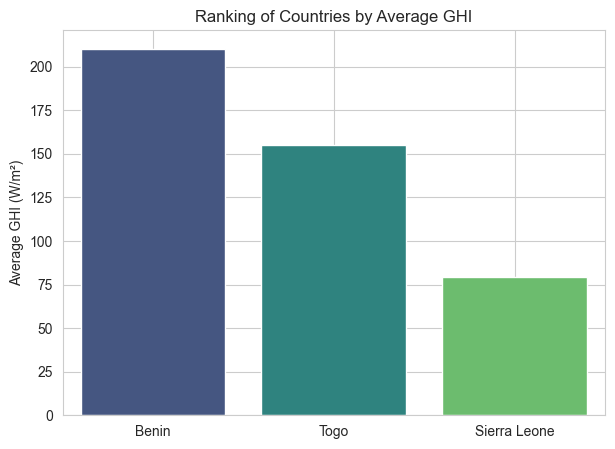

In [5]:
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title("Ranking of Countries by Average GHI")
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("")
plt.grid(True)
plt.show()
